In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.read_csv("Social_Network_Ads.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
358,15573926,Male,40,71000,1
174,15644296,Female,34,72000,0
326,15713463,Male,41,72000,0
74,15592877,Male,32,18000,0
103,15675949,Female,33,149000,1
267,15581282,Male,37,74000,0
305,15787550,Male,42,54000,0
20,15649487,Male,45,22000,1
260,15811177,Female,35,77000,0
113,15773447,Male,37,55000,0


In [18]:
x=df.iloc[:,[1,2,3]]
y=df.iloc[:,4:]

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()#approach 1,2,3
x['Gender']=le.fit_transform(x['Gender'])

c:\users\runnu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

c:\users\runnu\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=1000)

In [22]:
h=lr.predict(x_test)
#print(x_test,"\n",h,"\n",y_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,h)
cm

array([[48,  0],
       [32,  0]], dtype=int64)

In [24]:
as1=accuracy_score(y_test,h)
as1

0.6

Text(33.0, 0.5, 'predicted values')

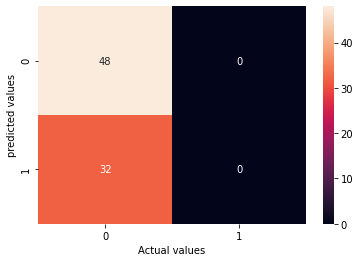

In [25]:
df1=pd.DataFrame(cm)
sb.heatmap(df1,annot=True)
plt.xlabel("Actual values")
plt.ylabel("predicted values")

KNN

In [26]:
x=df.iloc[:,[2,3]]
y=df.iloc[:,4:]

In [27]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=8)
kn.fit(x_train,y_train)

c:\users\runnu\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [73]:
h=kn.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,h)
cm

array([[45,  3],
       [14, 18]], dtype=int64)

In [63]:
as1=accuracy_score(y_test,h)
as1

0.7875

Text(33.0, 0.5, 'predicted values')

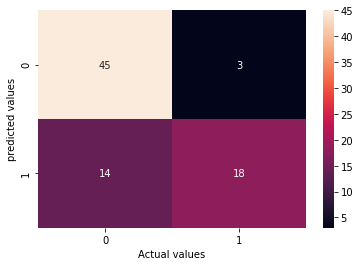

In [64]:
df1=pd.DataFrame(cm)
sb.heatmap(df1,annot=True)
plt.xlabel("Actual values")
plt.ylabel("predicted values")

Confused matrix implementation

In [80]:
p=y_test['Purchased'].values
print(h,'\n',p)
print(h.size)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 0] 
 [0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 0]
80


In [82]:
true_pos=0
true_neg=0
false_pos=0
false_neg=0
for i in range(80):
    if h[i]==p[i]==0:#First value either 0 or 1 is considered positive
        true_pos=true_pos+1
    elif h[i]==p[i]==1:
        true_neg=true_neg+1
    elif h[i]==1 and p[i]==0:
        false_neg=false_neg+1
    elif h[i]==0 and p[i]==1:
        false_pos=false_pos+1
print(true_pos,true_neg,false_pos,false_neg)

45 18 14 3
